<a href="https://colab.research.google.com/github/JSJeong-me/Machine_Learning/blob/main/ML/6_0811-iro-keras-wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('winequality-red.csv')

In [ ]:
data.describe()

In [ ]:
data.shape

In [ ]:
data.head()

In [ ]:
data.tail()

In [ ]:
data.isnull().sum()

In [ ]:
data.columns

In [ ]:
data_q_sort = data['quality'].unique().sort()

In [ ]:
test = data['quality'].unique()

In [ ]:
test

In [ ]:
data['quality'].value_counts()

In [ ]:
data.corr()

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
plt.figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

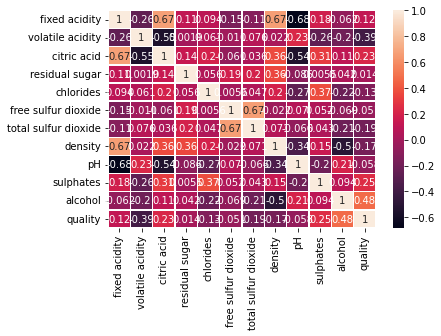

In [7]:
sns.heatmap(data.corr(), annot=True, linewidths=0.5)

In [11]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
len(data.columns)

12

In [21]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split

In [20]:
X = data.iloc[:, 0:11]

In [22]:
y = data['quality']

In [24]:
y.shape

(1599,)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler(feature_range=(0,1))

In [26]:
s_X_train = scaler.fit_transform(X_train)

In [27]:
s_X_test = scaler.fit_transform(X_test)

In [28]:
type(s_X_train)

numpy.ndarray

In [30]:
s_X_train.max()

1.0000000000000002

In [31]:
df_s_X_train = pd.DataFrame(s_X_train)

In [ ]:
df_s_X_train.describe()

In [35]:
# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=80, input_shape=[11], activation='relu'),
    layers.Dense(units=30, activation='relu'),
    layers.Dense(units=10, activation='relu'),
    layers.Dense(units=1, activation='linear')
])

In [36]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [ ]:
model.summary()

In [37]:
history = model.fit(s_X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
40/40 [==============================] - 3s 3ms/step - loss: 25.3847 - mse: 25.3847
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 4.8922 - mse: 4.8922
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 1.0357 - mse: 1.0357
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 0.8764 - mse: 0.8764
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 0.7802 - mse: 0.7802
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 0.6918 - mse: 0.6918
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 0.6344 - mse: 0.6344
Epoch 8/50
40/40 [==============================] - 0s 3ms/step - loss: 0.6000 - mse: 0.6000
Epoch 9/50
40/40 [==============================] - 0s 3ms/step - loss: 0.5865 - mse: 0.5865
Epoch 10/50
40/40 [==============================] - 0s 3ms/step - loss: 0.5686 - mse: 0.5686
Epoch 11/50
40/40 [==============================] - 0s 3ms/step - 

In [39]:
type(history)

keras.callbacks.History

In [ ]:
history.history

In [41]:
df_history = pd.DataFrame(history.history)

In [42]:
df_history.columns

Index(['loss', 'mse'], dtype='object')

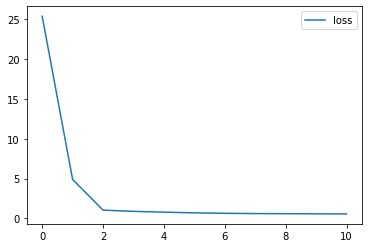

In [48]:
df_history.loc[0:10,['loss']].plot()

In [49]:
s_X_test.shape

(320, 11)

In [51]:
y_pred = model.predict(s_X_test)

In [66]:
y_pred[10].round()

array([7.], dtype=float32)

In [61]:
arr_y_test = y_test.values

In [67]:
arr_y_test[7]

5

In [ ]:
type(y_test)

In [69]:
mse__value, _ = model.evaluate(s_X_test, s_X_test)

10/10 [==============================] - 0s 3ms/step - loss: 30.7948 - mse: 30.7948


In [70]:
mse__value

30.794763565063477